1) Determine cuáles son los puntos A1..A8 tomando en cuenta que la matriz de distancias es
la distancia Euclidiana.




In [11]:
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
#A1(2,10), A2(2,5), A3(8,4), A4(5,8), A5(7,5), A6(6,4), A7(1,2), A8(4,9)
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9] ])

2. Utilice elbow para determinar el número de clústeres adecuado.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

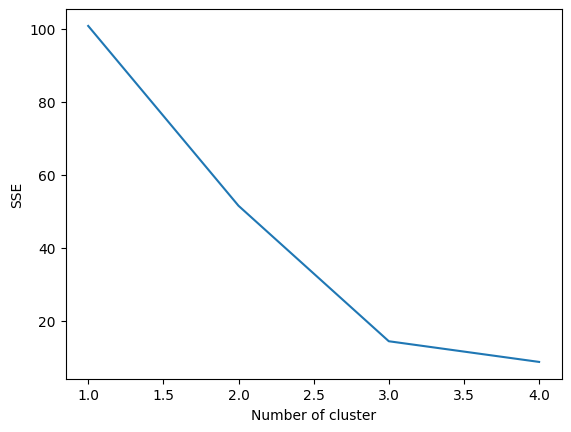

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,  random_state=0)
kmeans.fit(X)
#print(kmeans.cluster_centers_)
#print(kmeans.labels_)

sse = {}
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(X)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

3. Utilice el coeficiente de silueta para determinar el número de clústeres adecuado


In [13]:
for n_cluster in range(2, 4):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label)
    print("For c={}, The Silhouette Coef is {}".format(n_cluster, sil_coeff))

For c=2, The Silhouette Coef is 0.38834298285323554
For c=3, The Silhouette Coef is 0.5708086620582917


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ejecute KMeans y muestre gráficamente los clústeres resultantes.

[[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]


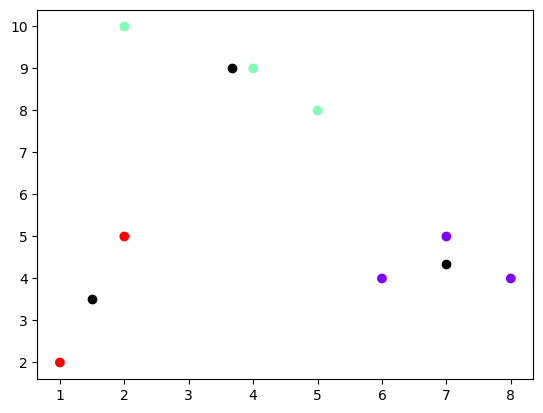

In [14]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.cluster import KMeans

#X = np.array([[1, 6], [2, 7], [3, 6], [4, 2], [5, 3],[6, 1], [7, 5], [8, 6], [9, 4], [10, 5]])

#plt.scatter(X[:,0],X[:,1], label='True Position')

#kmeans = KMeans(n_clusters=3)
#kmeans.fit(X)
print(kmeans.cluster_centers_)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

#plt.xlim(0, 9)
#plt.ylim(0, 6.5)
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1], color='black')

plt.show()

Ejecute KNearest nieghbor para determinar el clúster de cada punto de entrenamiento.

['P']


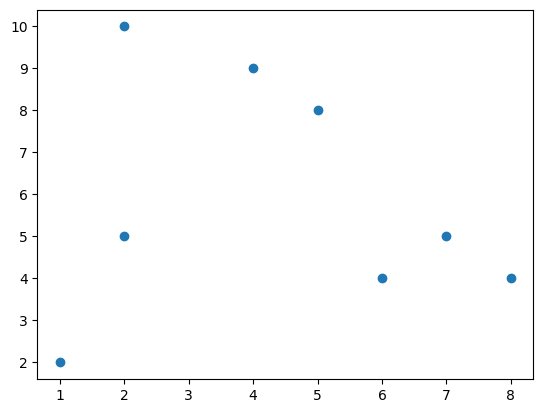

In [15]:
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
y = np.array(['N', 'P', 'N',
              'N', 'P', 'P','P','N'])
plt.scatter(X[:,0],X[:,1])
clf = NearestCentroid()
clf.fit(X, y)

print(clf.predict([[4, 4]]))